<left>
<table style="margin-top:0px; margin-left:0px;">
<tr>
  <td><img src="https://gitlab.com/worm1/worm-figures/-/raw/master/style/worm.png" alt="WORM" title="WORM" width=50/></td>
  <td><h1 style=font-size:30px>Activity Diagrams</h1><br />
</tr>
</table>
<\left>

### Getting ready

This demo uses functions from pyCHNOSZ. Import them with:

In [1]:
from pyCHNOSZ import *

Let's create an activity diagram of aqueous carbonate species at 25 $^{\circ}$C and 1 bar as a function of pH.

$$\text{CO}_{2} + \text{H}_{2}\text{O} \rightleftharpoons \text{HCO}_{3}^{-} + \text{H}^{+} \rightleftharpoons \text{CO}_{3}^{2-} + 2\text{H}^{+}$$

We will assume a total carbon log activity of -3

First, we assign a set of *basis species* for the calculation. These will serve as the building blocks for our carbonate species, and will help balance the reactions. A few premade basis species sets are available. You can read more about basis species and the premade sets [here](https://chnosz.net/manual/basis.html).

The premade set we will use is "CHNOS+". This comes with CO$_2$, H$_2$O, NH$_3$, H$_2$S, O$_2$, and H$^+$. We won't need some of these species (like NH$_3$ and H$_2$S), but it's okay to have extras.

Define a basis set with the `basis` function.

In [2]:
basis("CHNOS+")

,C,H,N,O,S,Z,ispecies,logact,state
CO2,1.0,0.0,0.0,2.0,0.0,0.0,1511,-3.0,aq
H2O,0.0,2.0,0.0,1.0,0.0,0.0,1,0.0,liq
NH3,0.0,3.0,1.0,0.0,0.0,0.0,64,-4.0,aq
H2S,0.0,2.0,0.0,0.0,1.0,0.0,65,-7.0,aq
O2,0.0,0.0,0.0,2.0,0.0,0.0,2612,-80.0,gas
H+,0.0,1.0,0.0,0.0,0.0,1.0,3,-7.0,aq


Next, we will define our species of interest, the carbonate species, with the `species` function. This will create balanced reactions with each carbonate species dissociating into basis species.

In [3]:
species(["CO2", "HCO3-", "CO3-2"])

,CO2,H2O,NH3,H2S,O2,H+,ispecies,logact,state,name
1,1.0,0.0,0.0,0.0,0.0,0.0,1511,-3.0,aq,CO2
2,1.0,1.0,0.0,0.0,0.0,-1.0,13,-3.0,aq,HCO3-
3,1.0,1.0,0.0,0.0,0.0,-2.0,14,-3.0,aq,CO3-2


Each row of the table above shows a dissociation reaction of a species of interest into basis species. The numbers given in the basis species columns are reaction coefficients; positive for products and negative for reactants.

In the first row, we have CO$_2$ dissocating into itself. That's because carbon dioxide is a species of interest AND a basis species.

In the second row, bicarbonate, HCO$_3^-$, plus a proton dissociates into carbon dioxide and water:

$$\text{HCO}_{3}^{-} + \text{H}^{+} \rightleftharpoons \text{CO}_{2} + \text{H}_{2}\text{O}$$

In the third row, CO$_3^{2-}$ plus two protons dissociates into carbon dioxide and water:

$$\text{CO}_{3}^{2-} + 2\text{H}^{+} \rightleftharpoons \text{CO}_{2} + \text{H}_{2}\text{O}$$

Now that `basis` and `species` are defined, we can create an activity diagram with:

affinity: temperature is 25 ºC

affinity: pressure is Psat

affinity: variable 1 is pH at 256 values from 2 to 14

subcrt: 9 species at 25 ºC and 1 bar (wet) [energy units: cal]

balance: on moles of CO2 in formation reactions

equilibrate: n.balance is 1 1 1

equilibrate: loga.balance is -2.52287874528034

equilibrate: using boltzmann method



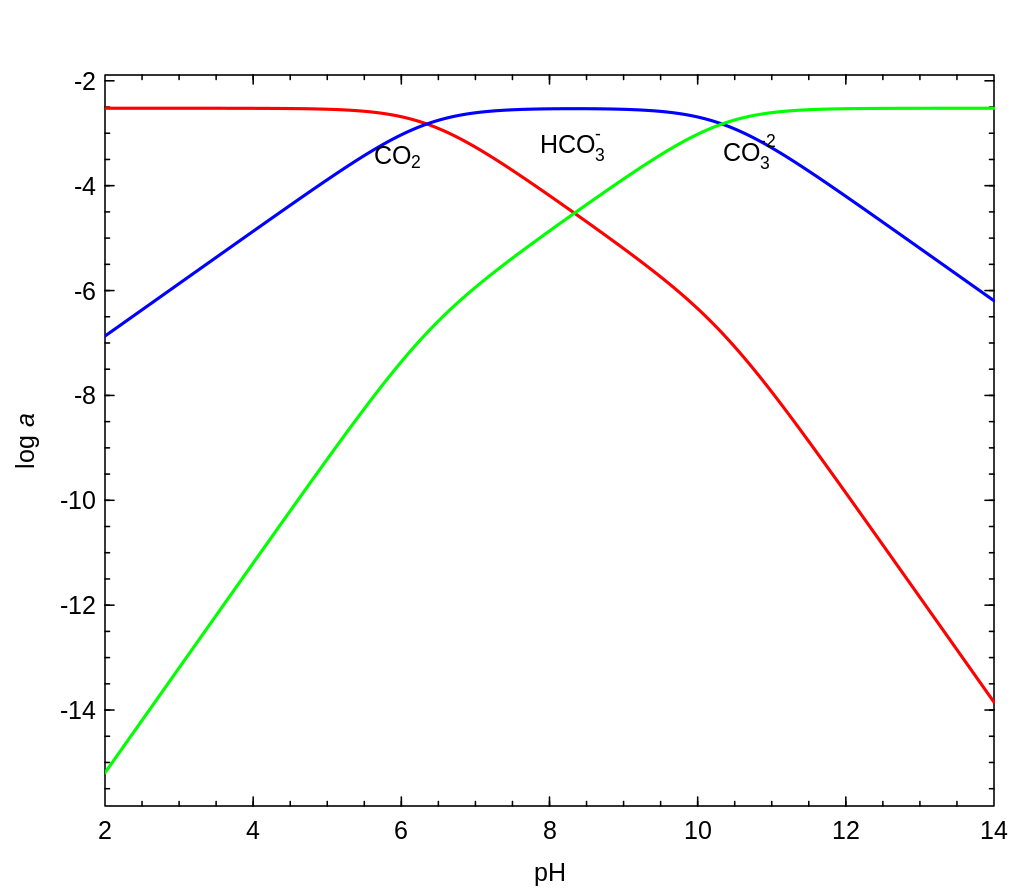

In [4]:
a = affinity(pH=[2,14], T=25)
e = equilibrate(a)
_ = diagram(e, col=["red","blue","green"], lwd=2, lty=[1,1,1], dy=-1)

As above, but with fractional abundances ("degree of formation") by setting `alpha=True` in the `diagram` function

affinity: temperature is 25 ºC

affinity: pressure is Psat

affinity: variable 1 is pH at 256 values from 2 to 14

subcrt: 9 species at 25 ºC and 1 bar (wet) [energy units: cal]

balance: on moles of CO2 in formation reactions

equilibrate: n.balance is 1 1 1

equilibrate: loga.balance is -2.52287874528034

equilibrate: using boltzmann method



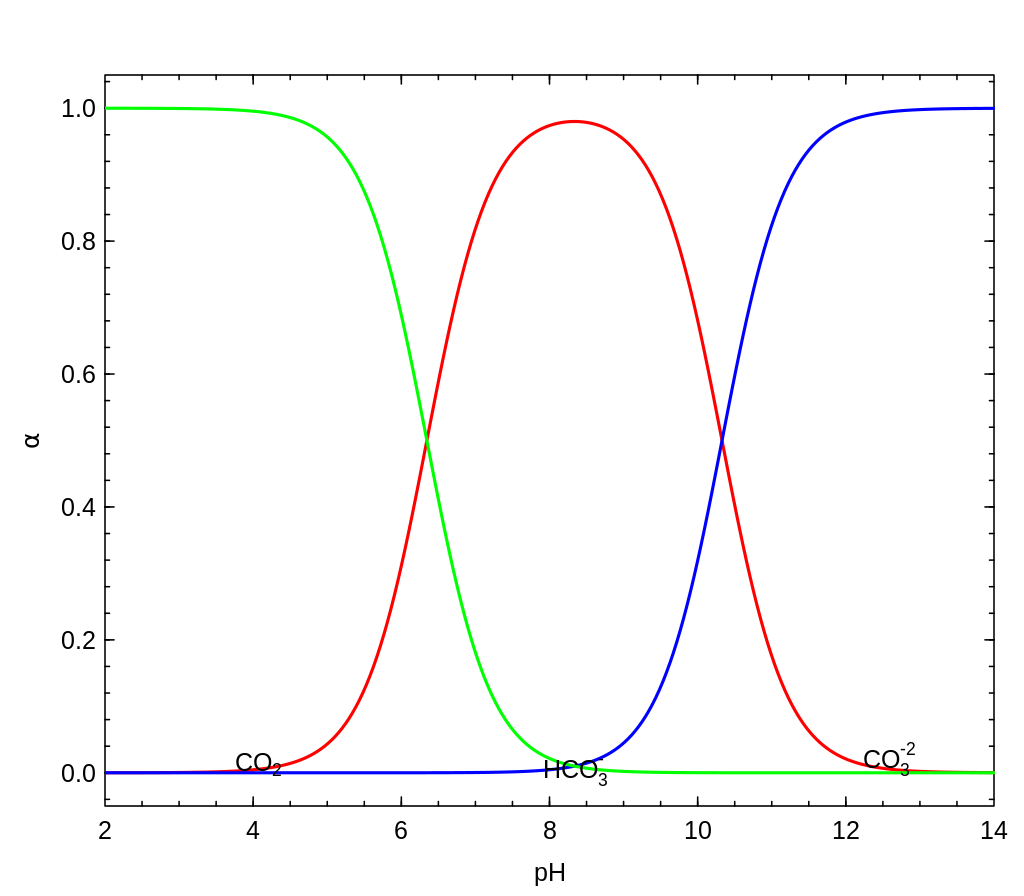

In [5]:
basis("CHNOS+")
species(["HCO3-","CO3-2","CO2"])
a = affinity(pH=[2,14], T=25)
e = equilibrate(a)
_ = diagram(e, alpha=True, col=["red","blue","green"], lwd=2, lty=[1,1,1], dy=-1)

Create a predominance diagram by providing two variables to the `affinity` function. For example, here is a predominance diagram of carbonate species along the liquid-vapor saturation curve as a function of temperature (0 to 350 °C) and pH (2 to 14).

affinity: pressure is Psat

affinity: variable 1 is pH at 256 values from 2 to 14

affinity: variable 2 is T at 256 values from 273.15 to 623.15 K

subcrt: 9 species at 256 values of T (ºC) and P (bar) (wet) [energy units: cal]



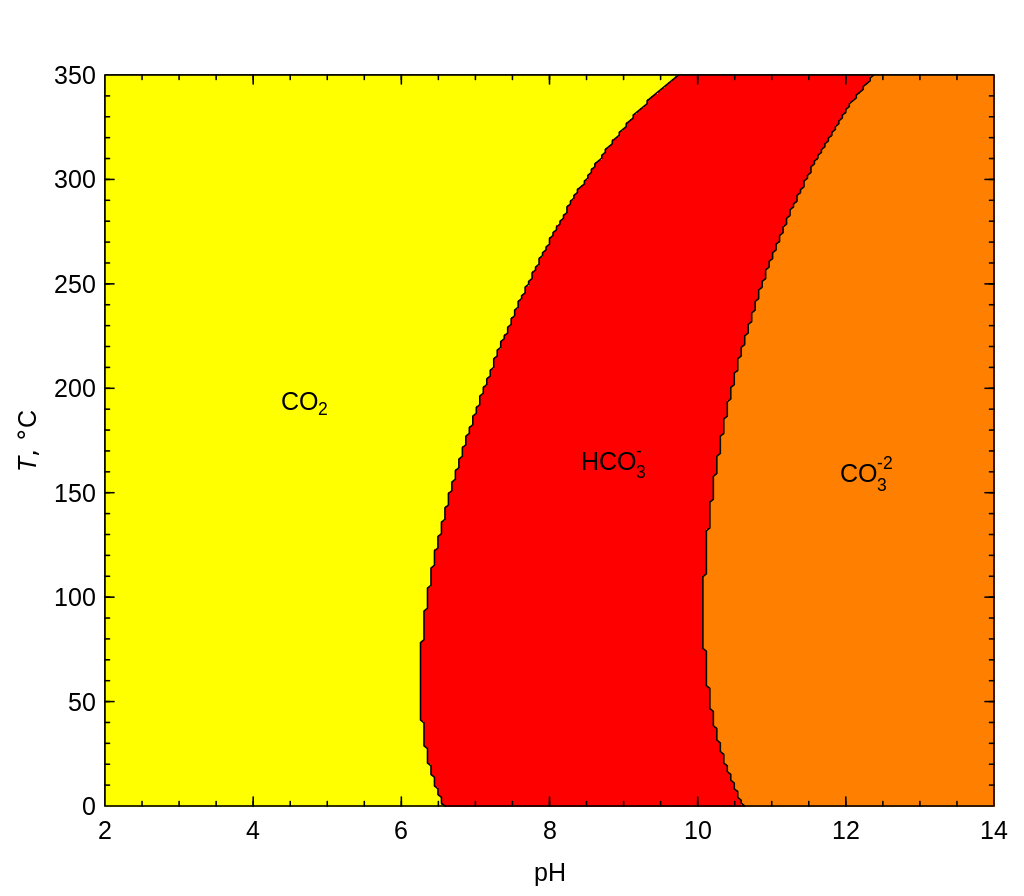

balance: on moles of CO2 in formation reactions

diagram: using maximum affinity method for 2-D diagram



In [6]:
basis("CHNOS+")
species(["HCO3-","CO3-2","CO2"])
a = affinity(pH=[2, 14], T=[0, 350])
_ = diagram(a, fill="heat")

Increase the resolution by performing more calculations in the grid. Let's try 600 by 600 calculations in this pH-temperature space. Note that 600 has been added as a third term in the pH and T lists and will define the number of calculations. The result takes longer to calculate but looks much smoother than the plot above:

affinity: pressure is Psat

affinity: variable 1 is pH at 600 values from 2 to 14

affinity: variable 2 is T at 600 values from 273.15 to 623.15 K

subcrt: 9 species at 600 values of T (ºC) and P (bar) (wet) [energy units: cal]



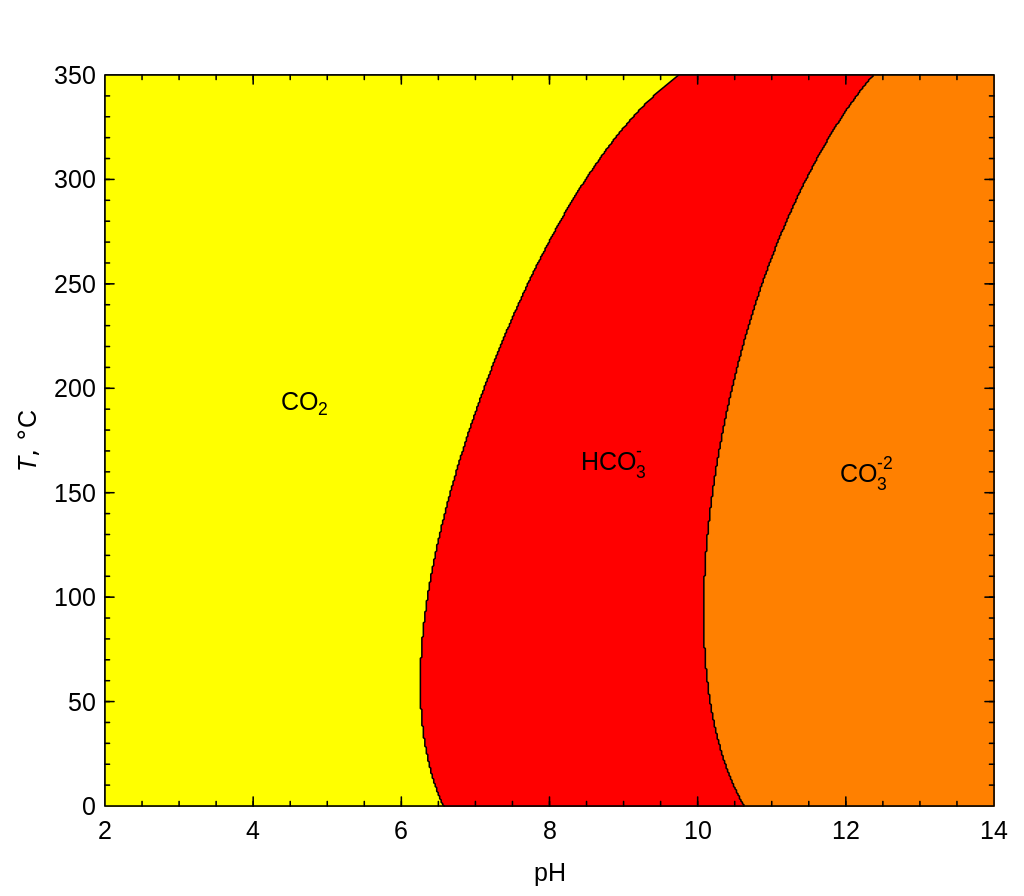

balance: on moles of CO2 in formation reactions

diagram: using maximum affinity method for 2-D diagram



In [7]:
basis("CHNOS+")
species(["HCO3-","CO3-2","CO2"])
a = affinity(pH=[2, 14, 600], T=[0, 350, 600])
_ = diagram(a, fill="heat")

Here is another example. This time, let's create an activity diagram of Al$^{3+}$ species at 25 $^{\circ}$C and 1 bar as a function of pH.

In [8]:
# load a few additional species like AlO+ from the SLOP98 database
_ = add_OBIGT("SLOP98")

add.OBIGT: read 170 rows; made 41 replacements, 129 additions [energy units: cal]



affinity: temperature is 25 ºC

affinity: pressure is Psat

affinity: variable 1 is pH at 256 values from 2 to 8

subcrt: 9 species at 25 ºC and 1 bar (wet) [energy units: cal]



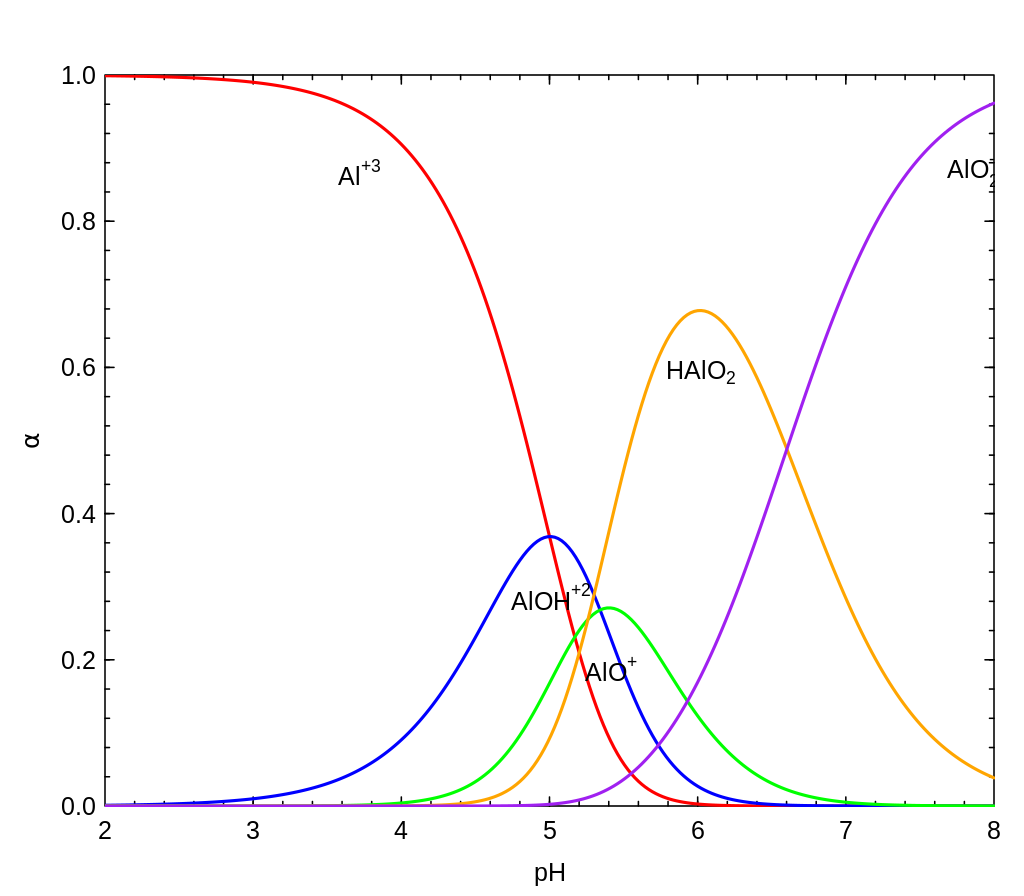

balance: on moles of Al+3 in formation reactions

diagram: plotting A/(2.303RT) / n.balance



In [9]:
basis(["Al+3","H2O","O2","H+"], [-3,0,-80,-7])
species(["Al+3","AlOH+2","AlO+","HAlO2", "AlO2-"])
a = affinity(pH=[2, 8], T=25)
_ = diagram(a, alpha=True, ylim=[0,1], col=["red","blue","green","orange","purple"], lwd=2, lty=[1,1,1], dy=-0.1)

Add a second variable to create a predominance diagram. For instance, here is a predominance diagram of Al$^{3+}$ species as a function of pH and temperature:

affinity: pressure is Psat

affinity: variable 1 is pH at 600 values from 0 to 8

affinity: variable 2 is T at 600 values from 298.15 to 623.15 K

subcrt: 9 species at 600 values of T (ºC) and P (bar) (wet) [energy units: cal]



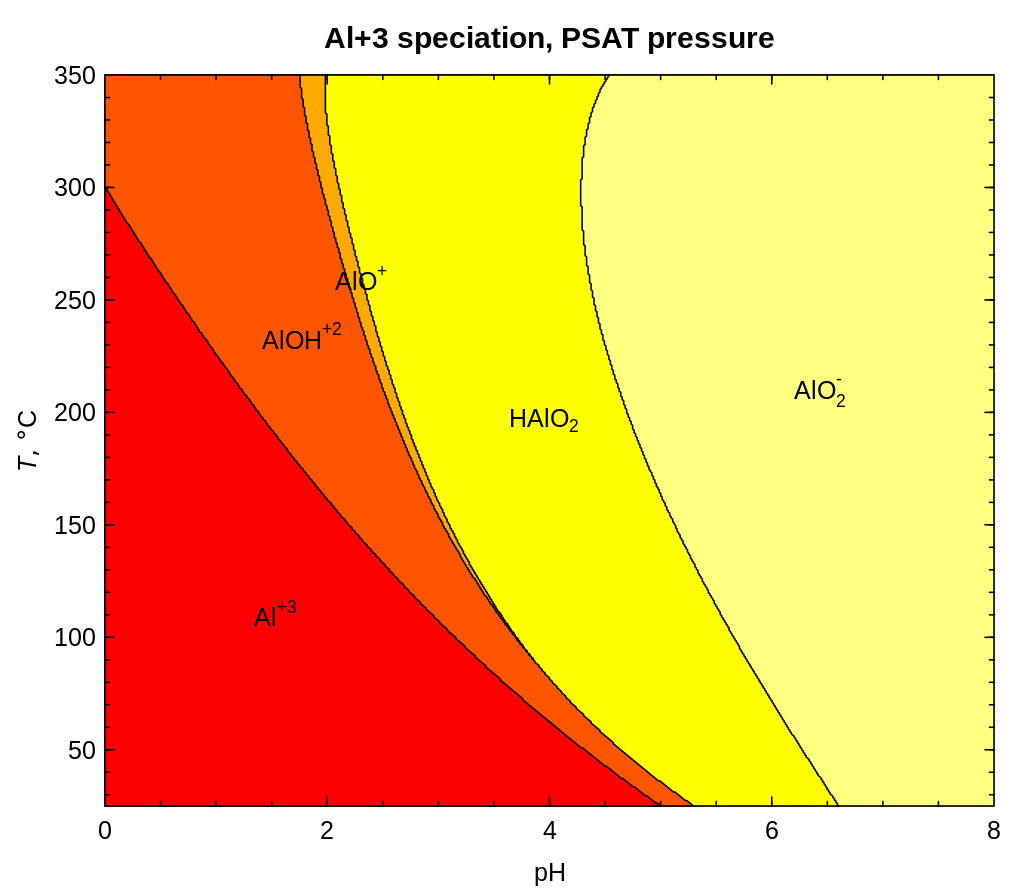

balance: on moles of Al+3 in formation reactions

diagram: using maximum affinity method for 2-D diagram



In [10]:
basis(["Al+3","H2O","O2","H+"], [-3,0,-80,-7])
species(["Al+3","AlOH+2","AlO+","HAlO2", "AlO2-"])
a = affinity(pH=[0, 8, 600], T=[25, 350, 600])
_ = diagram(a, fill="heat", main="Al+3 speciation, PSAT pressure") 

Next, let's create an Eh-pH diagram of aqueous sulfur species at 250 °C and 2000 bars. First, let's reset the database because it was modified in the example above.

In [11]:
reset() # reset database and basis species

reset: resetting "thermo" object

OBIGT: loading default database with 1880 aqueous, 3418 total species



affinity: temperature is 250 ºC

affinity: pressure is 2000 bar

affinity: variable 1 is pH at 256 values from 0 to 12

affinity: variable 2 is Eh at 256 values from -1 to 0.5 V

subcrt: 8 species at 250 ºC and 2000 bar (wet) [energy units: cal]



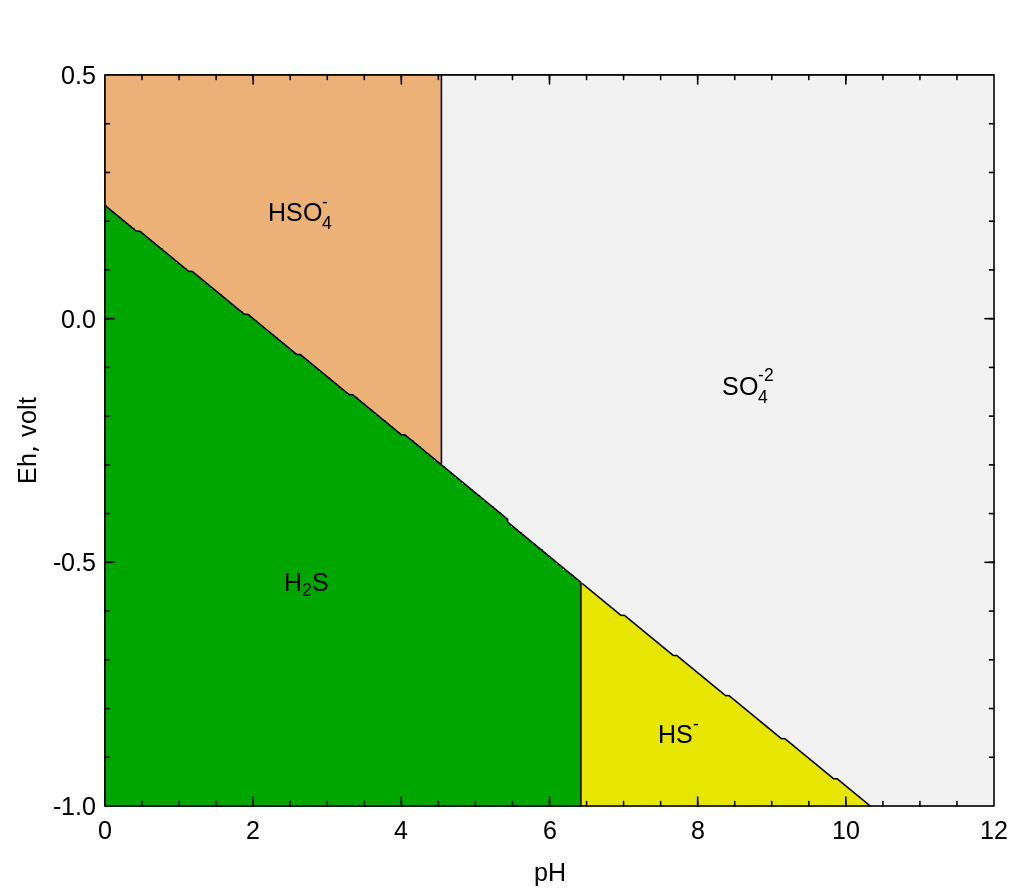

In [12]:
basis(["H2O", "H2S", "e-", "H+"])
species(["H2S", "HS-", "HSO4-", "SO4-2"])
a = affinity(pH=[0, 12], Eh=[-1, 0.5], T=250, P=2000)
_ = diagram(a, fill="terrain", messages=False)